
# **Importing Necessary Libraries and Dataset**


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Splitting MNIST Dataset into Training and Testing Dataset**

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = X_train.astype('float32') / 255.0
X = X.reshape(-1, 28, 28, 1)
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (42000, 28, 28, 1)
Testing data shape: (18000, 28, 28, 1)


# **Simple LeNet Model**

In [11]:
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



# **Simple AlexNet Model**

In [12]:
def build_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# **Training the Model(s)**

In [13]:
lenet = build_lenet()


print("Training LeNet model...")
lenet_history = lenet.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

lenet_score = lenet.evaluate(X_test, y_test)
print(f"LeNet Test Accuracy: {lenet_score[1]*100:.2f}%")


Training LeNet model...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8119 - loss: 0.6759 - val_accuracy: 0.9408 - val_loss: 0.2000
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9496 - loss: 0.1716 - val_accuracy: 0.9571 - val_loss: 0.1392
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9684 - loss: 0.1092 - val_accuracy: 0.9676 - val_loss: 0.1037
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9771 - loss: 0.0790 - val_accuracy: 0.9739 - val_loss: 0.0858
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9833 - loss: 0.0578 - val_accuracy: 0.9740 - val_loss: 0.0817
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0805
LeNet Test Accuracy: 97.56%


In [14]:
alexnet = build_alexnet()

print("Training AlexNet model...")
alexnet_history = alexnet.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
alexnet_score = alexnet.evaluate(X_test, y_test)
print(f"AlexNet Test Accuracy: {alexnet_score[1]*100:.2f}%")

Training AlexNet model...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.7990 - loss: 0.5666 - val_accuracy: 0.9618 - val_loss: 0.1180
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9804 - loss: 0.0659 - val_accuracy: 0.9856 - val_loss: 0.0493
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9858 - val_loss: 0.0510
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.9890 - val_loss: 0.0421
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9930 - loss: 0.0257 - val_accuracy: 0.9899 - val_loss: 0.0415
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0541
AlexNet Test Accuracy: 98.87%


# **Plot the training and validation accuracy for LeNet**



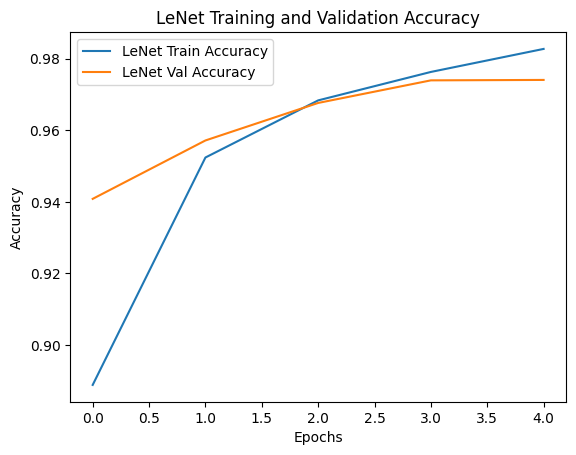

In [15]:
plt.plot(lenet_history.history['accuracy'], label='LeNet Train Accuracy')
plt.plot(lenet_history.history['val_accuracy'], label='LeNet Val Accuracy')
plt.title('LeNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Plot the training and validation accuracy for AlexNet**


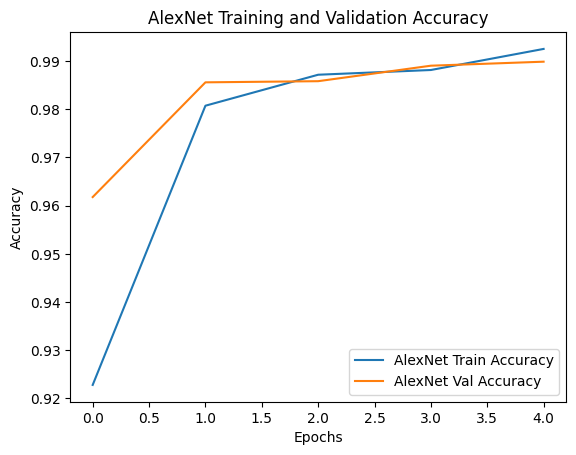

In [16]:
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()